In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data 
loan = pd.read_csv('loan.csv', engine = 'python')
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data Cleaning

Check the percentage of null values in each column

In [5]:
#Check Percentage of missing values in each column
#Display larger set of values of a dataframe
pd.set_option('display.max_rows', 200)
(loan.isnull().sum()* 100)/len(loan)

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

As there are many columns with 100% missing values, let's keep only those columns which have alteast 50% values. Drop all columns with more than 50% missing values ass they will not be of any use in the analysis.

In [6]:
#drop columns with more than 50% missing values
#thresh controls the numer of non-null values. Here if any column has atleast 50% non-null values, it survives 
loan_not_null = loan.dropna(axis = 'columns',  thresh=(0.50 *len(loan)))

In [7]:
#Check loan shape 
loan.shape

(39717, 111)

Lets observe the % of missing values in each column again

In [8]:
#Percentage of missing values in each column
(loan_not_null.isnull().sum()* 100)/len(loan_not_null)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


The 'desc' column has 32% null values. If we check the information in the 'desc' column then similar data ia available in 'title' and 'purpose' columns in a concise format. Hence we can drop 'desc' column as corressponding information can be analysed from 'title' and 'purpose' columns.

In [9]:
#Dropping desc column
loan_not_null = loan_not_null.drop('desc', axis = 'columns')
loan_not_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Let us check if any columns contain all duplicate/same values.

In [10]:
#Check the value in each row to get the unique values in each column
loan_not_null.nunique(axis=0).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

As observed above, there are many column which have duplicate values. These columns will not provide any value addition to the analysis. Hence we will drop them

In [11]:
#Deleting columns having all duplicate values
loan_nonull_and_duplicates = loan_not_null.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 
                  'acc_now_delinq', 'application_type', 'policy_code',
                 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1)


In [12]:
#let's check the shape of loan again
loan_nonull_and_duplicates.shape

(39717, 44)

Let's observe the dataset again to check if there are any collumns which will be redundant in the anallysis

In [13]:
loan_nonull_and_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

As observed above we have reduced our dataset to 39717 rows and 44 columns. If we observe the data dictionary provided to us we can see that there are furthermore columns which have the similar meaning. Consider the columns below:

__loan_amnt__ = The listed amount of the loan applied for by the borrower
<br>__funded_amnt__ = The total amount committed to that loan at that point in time i.e the amount recommended/approved by Lending Club
<br>__funded_amnt_inv__ = the amount funded by Lending club

Potentially these values will always be same. Hence for simplicity we can consider __loan_amt__ and drop remaining 2 columns from our analyis.

In [14]:
loan_nonull_and_duplicates.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1, inplace= True)

__title__ : The loan title provided by the borrower
<br>__purpose__ : A category provided by the borrower for the loan request

In [15]:
# Check values of title and purpose
loan_nonull_and_duplicates.title.value_counts().head(10)

Debt Consolidation           2184
Debt Consolidation Loan      1729
Personal Loan                 659
Consolidation                 517
debt consolidation            505
Home Improvement              356
Credit Card Consolidation     356
Debt consolidation            334
Small Business Loan           328
Credit Card Loan              317
Name: title, dtype: int64

In [16]:
loan_nonull_and_duplicates.purpose.value_counts().head(10)

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
Name: purpose, dtype: int64

As observed above, title and purpose appear to have the same meaning and values. Hence we will drop title.

In [17]:
loan_nonull_and_duplicates.drop(['title'], axis = 1, inplace= True)

In [18]:
loan_nonull_and_duplicates.shape

(39717, 41)

Similarly, the columns __id__, __member_id__, __url__, __zip_code__ will not have any impact on the analysis and can be safely dropped. 

In [19]:
loan_clean = loan_nonull_and_duplicates.drop(['id', 'member_id', 'url', 'zip_code'], axis = 1)

In [20]:
# Check the shape of loan
loan_clean.shape

(39717, 37)

From the remaining columns, we can further categorise them into 3 borad categories:
<br>__Demographic variables__ = Variables related to the applicant such as employment length, emp title etc.
<br> __Loan characteristics__ = Variables such as amount of loan, interest rate, purpose of loan etc.
<br> __Customer behaviour__  = Variables such as revolving balance, next payment date etc which are generated after the loan is approved.

Out of the above variables, we can safely drop __Customer behaviour__ variables as they will not be present with the investor when the persson applies for a loan and hence they won't help in taking a decision on accepting or rejecting the loan application 

In [21]:
customer_behaviour_var = ['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 
        'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

In [22]:
loan_clean = loan_clean.drop(customer_behaviour_var, axis=1)
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [23]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [24]:
#checking the shape again
loan_clean.shape

(39717, 17)

In [25]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

Rectifying the incorrect datatypes 

In [26]:
#Let us observe the int_rate column
loan_clean.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
16.71%      1
16.96%      1
17.34%      1
18.72%      1
21.48%      1
Name: int_rate, Length: 371, dtype: int64

In [27]:
# Clean interest rate to remove %
loan_clean['int_rate']= loan_clean['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [28]:
#Let us observe emp_length column
loan_clean.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [29]:
emp_length_dict = {
    '10+ years': 10,
    '< 1 year' : 0,
    '1 year'  : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9
}

In [30]:
#clean emp_length to replace years with numbers
loan_clean = loan_clean.replace({"emp_length": emp_length_dict})
loan_clean.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [31]:
#Lets observe term column
loan_clean.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [32]:
#Clean term to remove months
loan_clean.term = loan_clean.term.apply(lambda x: x.split()[0])
loan_clean.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [33]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  float64
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [34]:
#Converting term to int datatype
loan_clean.term = loan_clean.term.apply(pd.to_numeric)
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  int64  
 2   int_rate              39717 non-null  float64
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  float64
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

Let's
split issue_d i.e month in which the loan was funded into month and year column.

In [35]:
# Converting issue_d from object to datetime format for ease of splitting
loan_clean.issue_d = pd.to_datetime(loan_clean.issue_d, format='%b-%y')

In [36]:
loan_clean['issue_d_month'] = loan_clean['issue_d'].dt.month
loan_clean['issue_d_year'] = loan_clean['issue_d'].dt.year

In [37]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   term                  39717 non-null  int64         
 2   int_rate              39717 non-null  float64       
 3   installment           39717 non-null  float64       
 4   grade                 39717 non-null  object        
 5   sub_grade             39717 non-null  object        
 6   emp_title             37258 non-null  object        
 7   emp_length            38642 non-null  float64       
 8   home_ownership        39717 non-null  object        
 9   annual_inc            39717 non-null  float64       
 10  verification_status   39717 non-null  object        
 11  issue_d               39717 non-null  datetime64[ns]
 12  loan_status           39717 non-null  object        
 13  purpose         

Now our data set is ready for analyis. It has a 39717 rows and 19 columns. Let us copy it's data into a new file for ease of further analysis

In [38]:
loan_master = loan_clean[:]

# Data Analysis


Now our objective is to understand the factors which can lead to defaluters. Let us analyze the variables to understand the patterns which result in loan default

## Univariate Analysis

Let us perform analysis on categorical and numeric data and understand the major aspects of each one

Loan status

In [39]:
loan_master.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

As seen from above, loan status has 3 values. 
<br> __Fully Paid__ = Non - defaluters
<br> __Charged off__ = Defaulters
<br> __Current__ = Nothing can be confirmed yet. In the process of repaying loans.

As we are only interested in analyzing the defaulters, current value will be of no use to us. Hence we will ignore that value for further analysis

In [40]:
loan_master = loan_master[loan_master['loan_status'].isin(['Fully Paid','Charged Off'])]
loan_master.shape

(38577, 19)

In [41]:
loan_master['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [42]:
#Function to plot count plots of variables
def count_plot(var, rotate_val = 0):
    sns.countplot(x=var, data=loan_master)
    plt.xticks(rotation=rotate_val)
    plt.show()

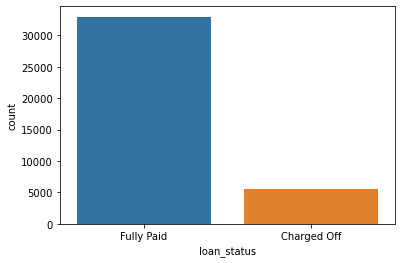

In [43]:
#Plotting a graph for loan status
count_plot('loan_status')

In [44]:
#Calculate percentage of defaulters
print("%.2f" %(loan_master.loc[loan_master['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan)))

14.17


**Observation:**
<br>From the above plot we can infer that most of the loans have been repaid fully.
<br>The percentage of defaluters is 14.17% 

Loan Amount

Let us check the loan amount variations

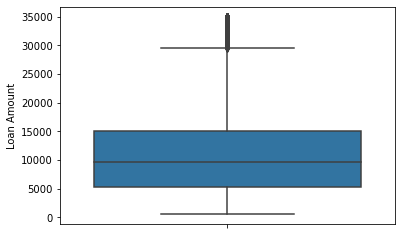

In [45]:
#Plotting a graph for loan_amout
sns.boxplot(y=loan_master["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [46]:
loan_master.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**Observation:**
<br>On an average the sanctioned loan amount varies between USD 5300 and USD 9600 with some outliers values having amount sanctioned as USD 35000.

Grades

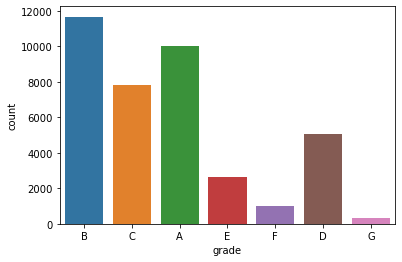

In [47]:
#plotting grades
count_plot('grade')

**Observation:**
<br>Most of the loans have grade of A and B. Therefore most of the loans are high graded loans

Purpose

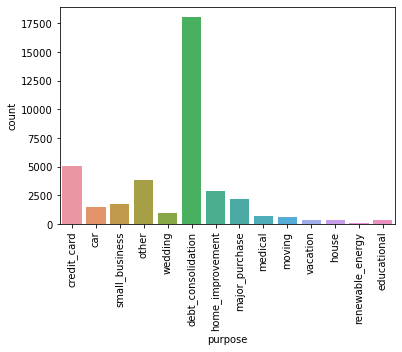

In [48]:
count_plot('purpose', 90)

Maximum number of loans have been for the category of Debt Consolidation followed by credit cards and others.

Emp Length

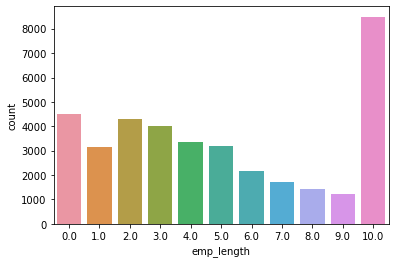

In [49]:
count_plot('emp_length')

**Observation:**
<br>Maximum loans are sanctioned to loan takers having around 10 years of work experience. However, the loans approved don't depend much on the employment length. There is no direct relation between the two.

Term

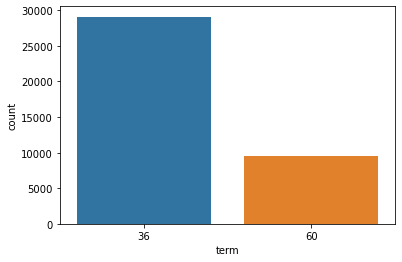

In [50]:
count_plot('term')

**Observation:**
<br>More number of loans have been sanctioned for the duration of 36 months as compared to 60 months.

issue_d_year i.e Year of funding

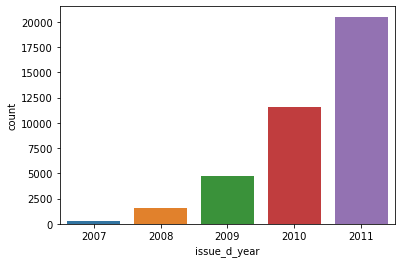

In [51]:
count_plot('issue_d_year')

**Observation:**
<br>Over the span of 4 years (2007 - 2011) the number of loans approved by Lending Club had witnessed a coniderable rise. This might imply that most of the loans approved by ending Club were recovered successfully

Verification Status

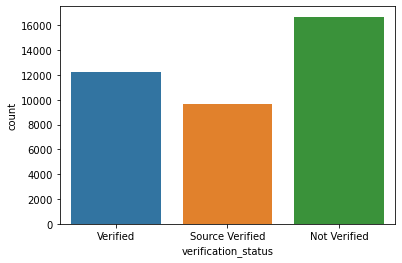

In [52]:
count_plot('verification_status')

**Obervation:**
<br>For majority of the loans approved, the income of borrower was unverified by Lending club. This might turn out to be a bad practice 

# Segmented Univariate

Let us convert loan status to a numeric value and analyze it accross several other categorical variables

In [53]:
#Converting loan status to numeric from categorical to analyze the default rate of loan status against various other categorical variables
loan_master.loan_status = loan_master.loan_status.apply(lambda x: 0 if x == 'Fully Paid' else 1)
loan_master.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

Let us plot the Default rate against various categorical variables and draw some observations with regards to loan defaults

In [54]:
# def plot_cat(cat_var):
#     sns.barplot( x= cat_var, y= 'loan_status', data=loan_master)
#     plt.show()

Default rate vs Loan amount

In [55]:
#Observe loan_amnt
loan_master.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
13950       1
29175       1
13025       1
19150       1
28750       1
Name: loan_amnt, Length: 870, dtype: int64

As loan_amnt has wide variations, for ease of analyis we can bin the values in appropriate buckets

In [56]:
#Binning loan_amount
def bin_loan_amount(n):
    if n < 5000:
        return 'less than 5000'
    elif n >= 5000 and n <15000:
        return '5000 - 15000'
    elif n>=15000 and n < 25000:
        return '15000 - 25000'
    else:
        return 'Greater than 25000'
loan_master['loan_amnt']= loan_master['loan_amnt'].apply(lambda x: bin_loan_amount(x))
loan_master['loan_amnt'].value_counts()

5000 - 15000          20675
15000 - 25000          7696
less than 5000         7444
Greater than 25000     2762
Name: loan_amnt, dtype: int64

Similarly we can observe other numerical varialbles and try to bin them for better analysis

In [57]:
loan_master.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [58]:
#Binning int_rate
def bin_int_rate(r):
    if r < 10:
        return 'less than 10%'
    elif r >= 10 and r < 15:
        return '10% - 15%'
    else:
        return 'More than 15%'
loan_master['int_rate'] = loan_master['int_rate'].apply(lambda x: bin_int_rate(x))
loan_master['int_rate'].value_counts()

10% - 15%        18514
less than 10%    12067
More than 15%     7996
Name: int_rate, dtype: int64

In [59]:
#Observing annual income
loan_master.annual_inc.value_counts()

60000.0    1466
50000.0    1029
40000.0     855
45000.0     811
30000.0     808
           ... 
34977.0       1
51360.0       1
69950.0       1
55454.0       1
90111.0       1
Name: annual_inc, Length: 5215, dtype: int64

In [60]:
#Binning annual_inc
def bin_annual_inc(x):
    if x < 50000:
        return 'less than 50000'
    elif x >= 50000 and x < 100000:
        return '50000 - 100000'
    else:
        return 'Higher than 100000'
loan_master['annual_inc'] = loan_master['annual_inc'].apply(lambda x: bin_annual_inc(x))
loan_master['annual_inc'].value_counts()

50000 - 100000        18238
less than 50000       14360
Higher than 100000     5979
Name: annual_inc, dtype: int64

In [61]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  object        
 1   term                  38577 non-null  int64         
 2   int_rate              38577 non-null  object        
 3   installment           38577 non-null  float64       
 4   grade                 38577 non-null  object        
 5   sub_grade             38577 non-null  object        
 6   emp_title             36191 non-null  object        
 7   emp_length            37544 non-null  float64       
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  object        
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  datetime64[ns]
 12  loan_status           38577 non-null  int64         
 13  purpose         

**Observation:**
It can be observed that longer the duration of loan, higher is the probabiity of defaulting

In [62]:
def plot_categories(df, arr):
    plt.figure(figsize=(15,20))
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        if val == 'purpose':
            plt.xticks(rotation=90)
        ax = sns.barplot(x=val, y = 'loan_status', data=loan_master)
#         showLabels(ax)
    plt.tight_layout()

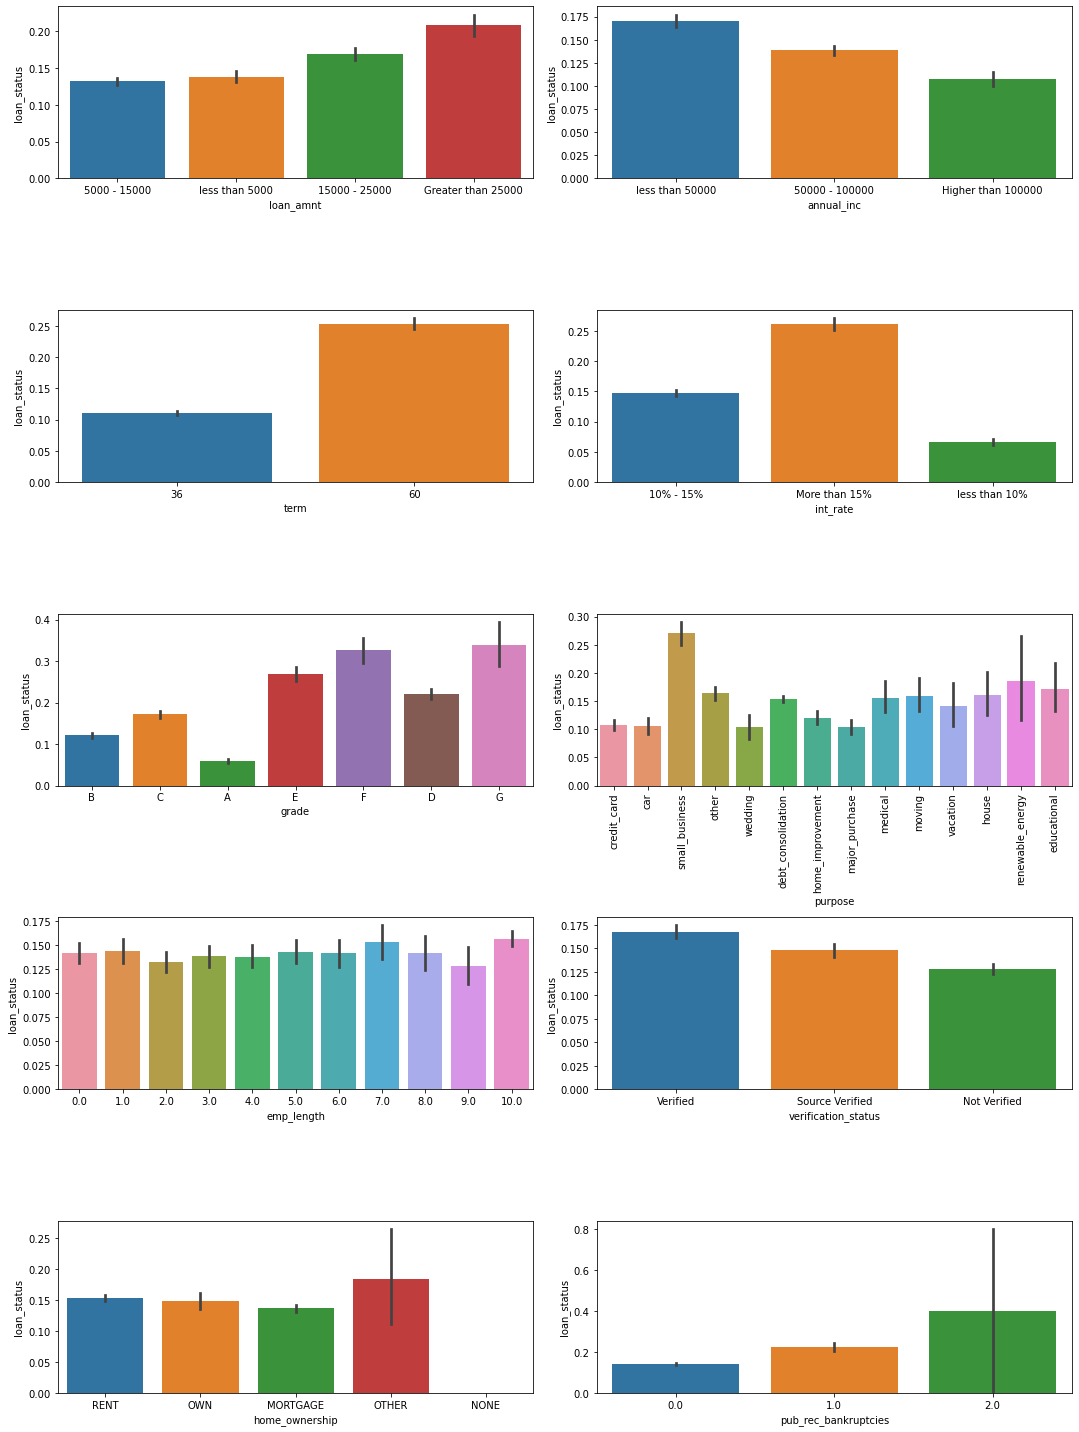

In [63]:
plot_categories(loan_master, ['loan_amnt', 'annual_inc', 'term', 'int_rate', 'grade', 'purpose', 'emp_length', 'verification_status', 'home_ownership', 'pub_rec_bankruptcies'])

**Observations:**
* **Default rate vs loan_amnt:** If the loan amount is increasing, the probability of defaulting also increases. Higher loan amounts, higher the probability to default
* **Default rate vs annual_inc:** The probability to default is higher in lower income groups and lower in higher income groups.
* **Default rate vs term:** The longer the duration of loan, higher is the probabiity of defaulting
* **Default rate vs int_rate:** The probability to default rises proportionately with the rate of interest. For loans with higher interest rate, the defaullt rate observed is higher
* **Default rate vs grade:** For loans with Grade 'A', the default rate is least and it increases proportionately with maximum value for grade 'G'. So lower grade quality loans are more prone to default as compared to those of higher grade.
* **Default rate vs purpose:** The probability of defaulting varies considerably with the purpose of applying for a loan.
* **Default rate vs emp_length:** There is a marginal difference in the probability of defaulting with respect to the employment length of the loan taker. However it can be observed that those with 10 years of employment length tend to default more as compared to those with lesser years of employment length.
* **Default rate vs verification_status:** It appears that for Verified loans the proability of defaulting is higher as compared to Not verified loans.
* **Default rate vs home_ownership:** The probaility of defaulting is highest for 'Other'. However there is just a marginal impact of various home ownership statuses on the default rate.
* **Default rate vs pub_rec_bankruptcies:** It can be observed that for loan takers with higher record of bankruptcies in the past, the probability of defaulting increases. Those with no bankruptcy records have a very small chance of defaulting.

Thus we can observe few factors and patterns which result in loan default 

# Bivariate Analysis

Let us analyze Default rate by grouping it over loan characteritc variables and demographic variables to understand and confirm our observations of univariate analysis

In [64]:
#Function to observe Default Rate over 2 varibales
def bar_plot(cat_var1, cat_var2):
    plt.figure(figsize=(10,6))
    if cat_var1 == 'purpose':
            plt.xticks(rotation=90)
    sns.barplot(x=cat_var1, y='loan_status', hue=cat_var2, data=loan_master)
    plt.show()

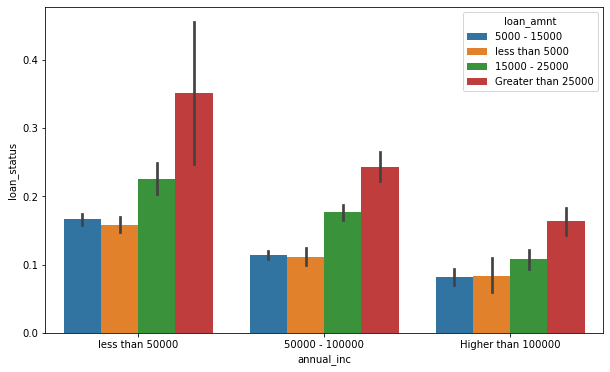

In [65]:
bar_plot('annual_inc','loan_amnt')

**Observation:**
<br>For higher loan amounts the proability to default is higher. However, loan takers with higher annual incomes, even if they have applied for higher loan amounts have lesser probability of defaulting as compared to the ones with medium or lower salaries. 

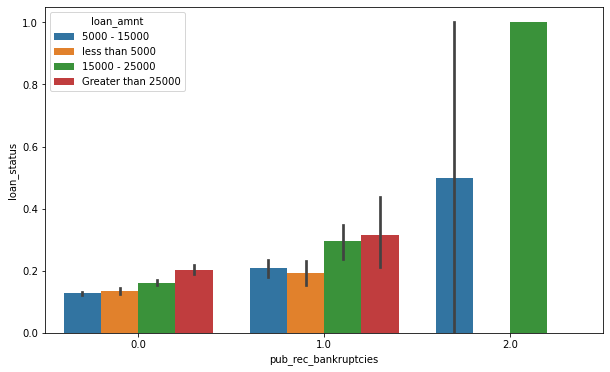

In [66]:
bar_plot('pub_rec_bankruptcies','loan_amnt')

**Observation:**
<br> Loan takers with loan amounts less than 5000 have lesser chances of defaulting even if they have been bankrupt before. The default rate is directly proportinal to the loan amount and bankruptcy values. Increae in either of the two will increase the tendancy to default

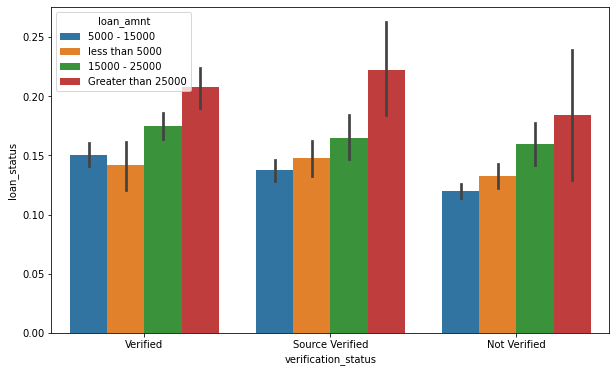

In [67]:
bar_plot('verification_status','loan_amnt')

**Observation:**
<br>Most of the loans of higher values were verified by Lending Club. However, the default rate is higher for verified and source verified loans. From the previous observations, it can be said that the probability to default depends more on the loan amount and annual income and verification status doesn't contribute much to the driving factors.

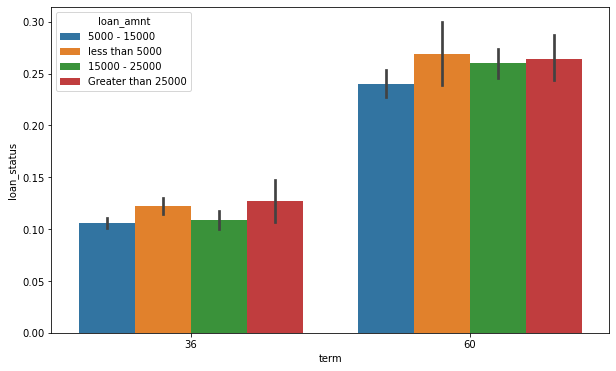

In [68]:
bar_plot('term','loan_amnt')

**Observation:**
<br>Most of the loans defaulted have been of a higher duration.

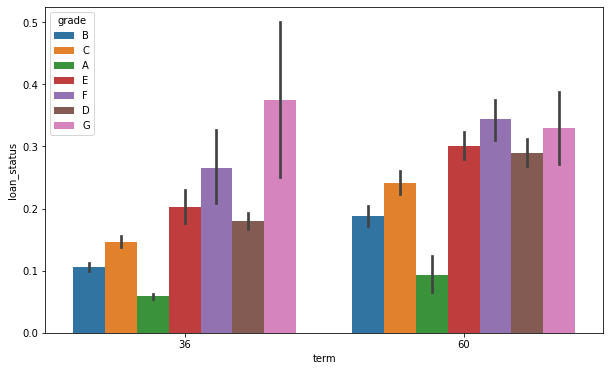

In [69]:
bar_plot('term','grade')

**Observation:**
<br>Default rates are higher for loans of lower grades of longer durations.

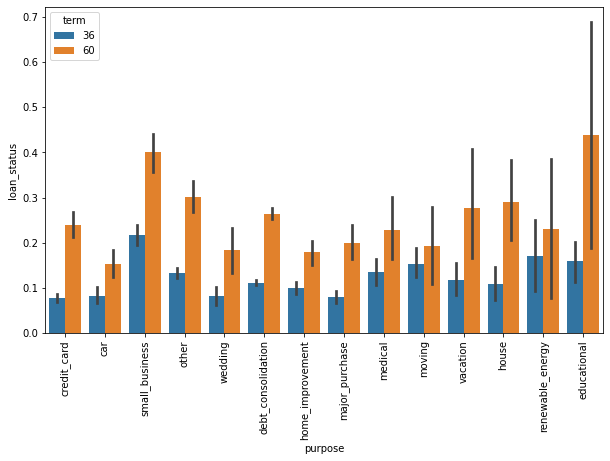

In [70]:
bar_plot('purpose','term')

**Observation:**
<br>Small business has been the most risky loan cateogry. Maximum default rate is observed for it over longer as well as shorter durations.
For al other categories, longer duration have defaulted more as compared to shorter duration ones. Educational loans of longer duration have also resulted in large defaults followed by house, vacation and debt-consolidation loans

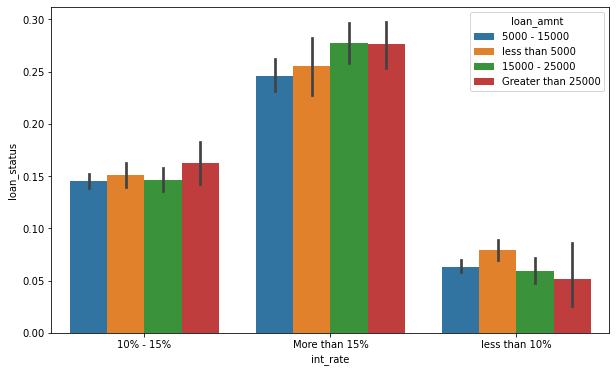

In [71]:
bar_plot('int_rate','loan_amnt')

**Observation:**
<br>Loans of any values of higher interest rates have defaulted most

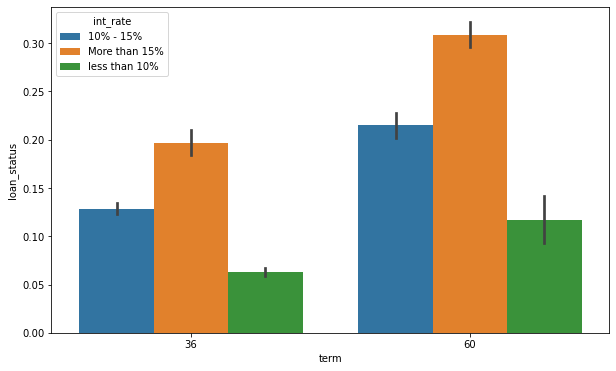

In [72]:
bar_plot('term','int_rate')

**Observation:**
<br>Loans of longer as well as shorter durations of higher interest rates have defaulted more as compared to those with lesser interest rates